<a href="https://colab.research.google.com/github/safreitas2000/ml-analytics-mvp/blob/main/machine-learning/ML_MVP_v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP | Disciplina Machine Learning & Analytics - Modelo de Machine Learning - Letra a.
Aluno: Sérgio Augusto Freitas Filho</br></br>


##1. Definição do Problema

**Qual é a descrição do problema?**
O problema em questão consiste em realizar a predição da faixa de renda à qual um indivíduo pertence, classificando-o em uma das duas categorias: ">50k" ou "<=50K". Trata-se de um problema de classificação binária, onde o objetivo é determinar a classe de renda do indivíduo com base em suas características individuais. </br>

**Hipótese:** Com base na natureza dos dados e no contexto do problema, levanta-se a hipótese de que a idade média dos indivíduos com salário ">50.000" será maior do que a idade média dos indivíduos com salário "<=50.000".

**Dataset:** O dataset utilizado para a resolução do problema é o "Salary Prediction Classification", acessado através do link https://www.kaggle.com/datasets/ayessa/salary-prediction-classification. Esse conjunto de dados contém informações detalhadas sobre características individuais dos indivíduos, tais como cor da pele, sexo, escolaridade, nacionalidade, ocupação, entre outras. Além disso, apresenta um campo Target com duas possíveis classes: ">50k" ou "<=50K", indicando a respectiva faixa de renda anual dos indivíduos. O objetivo é utilizar essas informações para construir e avaliar modelos de machine learning capazes de predizer com precisão a classe de renda de novos indivíduos não vistos no conjunto de dados.


In [14]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

###1.1 Carga e Visualização do DataSet

In [22]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/safreitas2000/ml-analytics-mvp/main/salary.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',', nrows=5000) #32.561 linhas no total   #20000 funciona

dataset.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


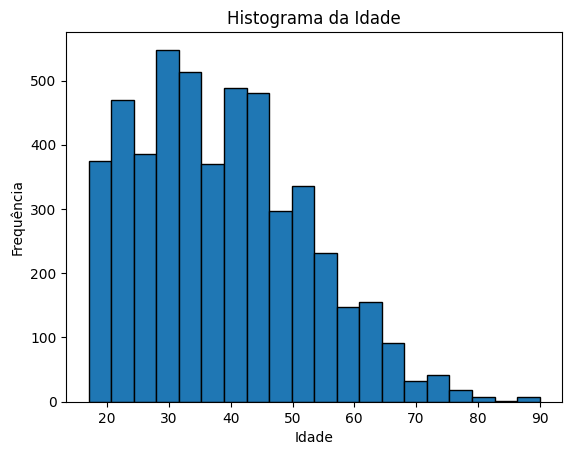

In [23]:
# Plotando o histograma da coluna 'age'
plt.hist(dataset['age'], bins=20, edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()

## 2. Preparação dos Dados

1. Realizei um pré-processamento manual do DataSet, onde exclui linhas com dados faltantes e marcados com "?";
2. Inicialmente implementei a classe LabelEncoder para codificar os atributos object (texto) em valores numéricos, entretanto, verifiquei que a atribuição dos números com o LabelEncoder pode criar uma ordem artificial que poderia influenciar indevidamente alguns algoritmos, para mitigar esse risco optei pela codificação **OneHotEncoder**, abaixo detalhamos como foi esse processo.
3. Realizada a separação do dataset em treino e teste. Utilizado padrão de 80% da base para treino e 20% para teste.
4. Inicialmente realizei validação cruzada com 10 partições, reduzi para 5 para otimizar o tempo de execução. A validação cruzada é fundamental para tornar o processo de treinamento mais robusto e contribuir para capacidade de generalização dos modelos .
5. Utilizado SelectKBest para seleção dos melhores atributos para predição, os detalhes da estratégia adotada está mais abaixo em uma seção específica.



In [24]:
# Aplicação do OneHotEncoder no Dataset
categorical_columns = dataset.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False) # Cria uma instância do OneHotEncoder
encoded_columns = encoder.fit_transform(dataset[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
dataset_encoded = pd.DataFrame(encoded_columns, columns=encoded_column_names) # Cria um novo DataFrame com as colunas codificadas
dataset_encoded = pd.concat([dataset.drop(columns=categorical_columns), dataset_encoded], axis=1)# Concatena as colunas codificadas com o DataFrame original
dataset_encoded = dataset_encoded.drop(columns=['salary_ >50K'])#eliminei a coluna duplicada do target que não é necessária.

# Visualização preliminar das colunas escolhidas para teste da hipótese
selected_columns = dataset_encoded[["age", "salary_ <=50K"]]

# Exibindo as primeiras linhas das colunas selecionadas
selected_columns.head(10)

,age,salary_ <=50K
0,39,1.0
1,50,1.0
2,38,1.0
3,53,1.0
4,28,1.0
5,37,1.0
6,49,1.0
7,52,0.0
8,31,0.0
9,42,0.0


###Estratégia utilizada para *Feature Selection*

O dataset tinha originalmente 14 atributos. Foi necessário aplicar o OneHotEncoder para representação numérica e chegamos a 108 atributos.

1. Dos 108 atributos selecionei os 5 primeiros com os melhores _scores indicados pelo SelectKBest.
2. Entre os 5 melhores _scores, extrapolei para pegar todas as features criadas pelo OneHotEncoder referente ao atributo original. Desta forma chegamos a 32 atributos para treinamento dos modelos.

No Feature Selection selecionei os 5 atributos _scores mais altos com SelectKBest:
['age' 'education-num' 'marital-status_ Married-civ-spouse'
 'marital-status_ Never-married' 'relationship_ Husband']</br>
Executei um filtro no DataSet (hotencoder) para considerar todos os atributos com as palavras abaixo, de forma a não excluir qualquer categoria relacionada a  feature original  ['age', 'education', 'marital', 'relationship'].

In [31]:
seed = 7

#DataSet hotencoder completo
array = dataset_encoded.values
X = array[:,0:106]
y = array[:,105]

# Seleção dos 5 melhores atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)
fit = best_var.fit(X, y)
features = fit.transform(X)
np.set_printoptions(precision=3)

# Pegamos todos os atributos relacionados aos 5 primeiros do SelectKBest
palavras_chave = ['age', 'education', 'marital', 'relationship']
colunas_filtradas = dataset_encoded.filter(regex='|'.join(palavras_chave))

#print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados com SelectKBest:\n", best_var.get_feature_names_out(input_features=dataset_encoded.columns[0:108]))

print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero de atributos SelectKBest:', features.shape[1])
print('\nNúmero de atributos considerando todos relacionados aos 5 primeiros do KBest:', colunas_filtradas.shape[1])
print("\nSegue os 32 atributos selecionados:\n", colunas_filtradas.columns.tolist())

# Separação do DataSet em base de treino e teste com 20% dos dados para teste dos modelos. Já considerado o SelectKBest onde X=features.
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(colunas_filtradas, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


Atributos Selecionados com SelectKBest:
 ['education-num' 'marital-status_ Married-civ-spouse'
 'marital-status_ Never-married' 'relationship_ Husband' 'salary_ <=50K']

Número original de atributos: 106

Número de atributos SelectKBest: 5

Número de atributos considerando todos relacionados aos 5 primeiros do KBest: 32

Segue os 32 atributos selecionados:
 ['age', 'education-num', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Exec-mana

In [32]:
# Exibe o DataFrame com as colunas filtradas
colunas_filtradas.head(10)

,age,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,...,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Exec-managerial,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,37,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,49,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,52,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,31,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,42,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## 3. Modelagem e Treinamento
Selecionamos algoritmos de Machine Learning apropriados para problemas de classificação em aprendizado supervisionado, levamos em consideração a natureza do problema de classificação binária, onde deseja-se prever o salário como ">50K" ou "<=50K". A escolha de testar esses algoritmos visa explorar diferentes abordagens e técnicas para resolver o problema de classificação acima. </br>
Cada algoritmo tem suas vantagens e desvantagens, e a avaliação de múltiplos modelos permite identificar qual deles se adequa melhor aos dados específicos do dataset em questão. A avaliação de múltiplos algoritmos é uma prática comum para encontrar o melhor modelo para uma tarefa de aprendizado de máquina específica.</br>
</br>
**Algoritmos selecionados:** Regressão Logística, KNN, Árvore de decisão, Naive Bayes, SVM e os ensambles BaggingClassifier, RandomForest, ExtraTrees, AdaBoost, GradientBoosting e Voting. </br>

(*) Os parâmetros da árvore de decisão num_trees e max_features foram variados e fixados em 100 e 3 que apresentou melhor resultado.</br>

###3.1 Avaliação inicial dos modelos (linha base)

LR: 0.820500 (0.011473)
KNN: 0.790500 (0.014221)
CART: 0.765500 (0.014504)
NB: 0.627000 (0.021774)
SVM: 0.797250 (0.005500)
Bagging: 0.783500 (0.009062)
RF: 0.779750 (0.007391)
ET: 0.773000 (0.011795)
Ada: 0.824750 (0.008307)
GB: 0.824250 (0.009307)
Voting: 0.819750 (0.006680)


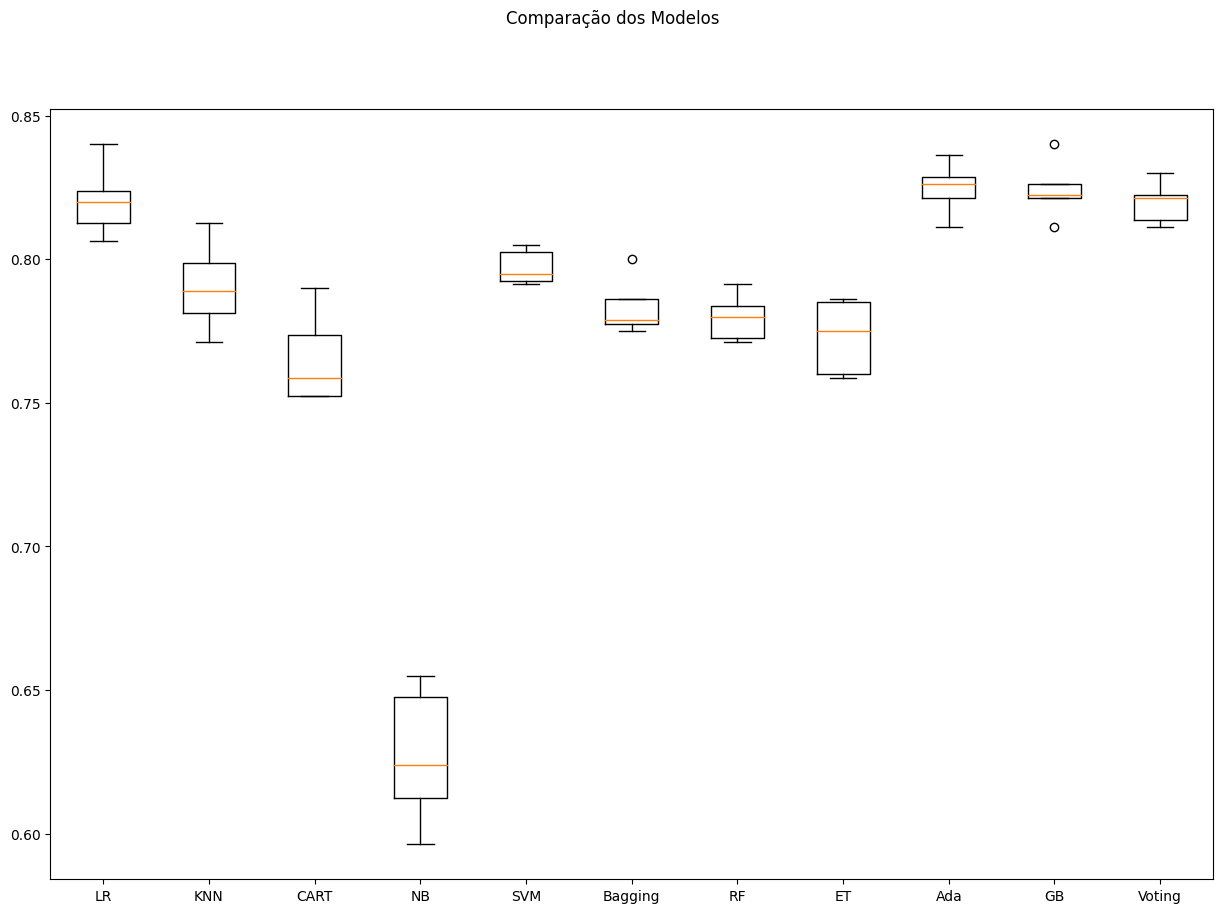

In [33]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####3.1.1 Resultados iniciais

Os modelos AdaBoost e Gradient Boosting obtiveram as maiores acurácias médias, superando ligeiramente os outros modelos testados.
Os algoritmos de ensamble (AdaBoost, Gradient Boosting e Voting) se destacaram na predição de salários, possivelmente devido à combinação de modelos diversificados.
Os modelos baseados em árvores (CART, Bagging, RF e ET) tiveram um desempenho competitivo, sendo úteis para problemas com dados estruturados.
A Regressão Logística e o SVM também tiveram desempenho sólido, com acurácias médias próximas às do Gradient Boosting e AdaBoost.

### 3.2 Avaliação dos modelos no Pipeline: dados padronizados e normalizados

Nesta seção vamos avaliar novamente a performance dos algoritmos de Regressão Logística, K-Nearest Neighbors (KNN), Árvore de Decisão, Naive Bayes, Support Vector Machine (SVM) e diversos ensambles, como Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting e Voting. Porém nessa etapa vamos trabalhar com  elementos de pré-processamento para padronizar e normalizar os dados, utilizando StandardScaler e MinMaxScaler, respectivamente.

Em seguida, são montados os pipelines, que combinam os modelos de classificação com as transformações de pré-processamento. São criados três conjuntos de pipelines para avaliar o desempenho dos modelos com o dataset original, dataset padronizado e dataset normalizado.

O código executa os pipelines com a função cross_val_score, que realiza a validação cruzada para cada modelo e coleta as métricas de avaliação, como a acurácia média e o desvio padrão, ao longo das partições da validação cruzada.


LR-orig: 0.821 (0.011)
KNN-orig: 0.790 (0.014)
CART-orig: 0.766 (0.015)
NB-orig: 0.627 (0.022)
SVM-orig: 0.797 (0.006)
Bag-orig: 0.784 (0.009)
RF-orig: 0.780 (0.007)
ET-orig: 0.773 (0.012)
Ada-orig: 0.825 (0.008)
GB-orig: 0.824 (0.009)
Vot-orig: 0.820 (0.007)
LR-padr: 0.820 (0.012)
KNN-padr: 0.802 (0.013)
CART-padr: 0.765 (0.016)
NB-padr: 0.549 (0.017)
SVM-padr: 0.821 (0.010)
Bag-padr: 0.784 (0.008)
RF-padr: 0.778 (0.005)
ET-padr: 0.773 (0.011)
Ada-padr: 0.825 (0.008)
GB-padr: 0.824 (0.009)
Vot-padr: 0.819 (0.011)
LR-norm: 0.821 (0.013)
KNN-norm: 0.799 (0.009)
CART-norm: 0.765 (0.016)
NB-norm: 0.569 (0.024)
SVM-norm: 0.819 (0.012)
Bag-norm: 0.783 (0.008)
RF-norm: 0.780 (0.006)
ET-norm: 0.773 (0.011)
Ada-norm: 0.825 (0.008)
GB-norm: 0.824 (0.009)
Vot-norm: 0.819 (0.012)


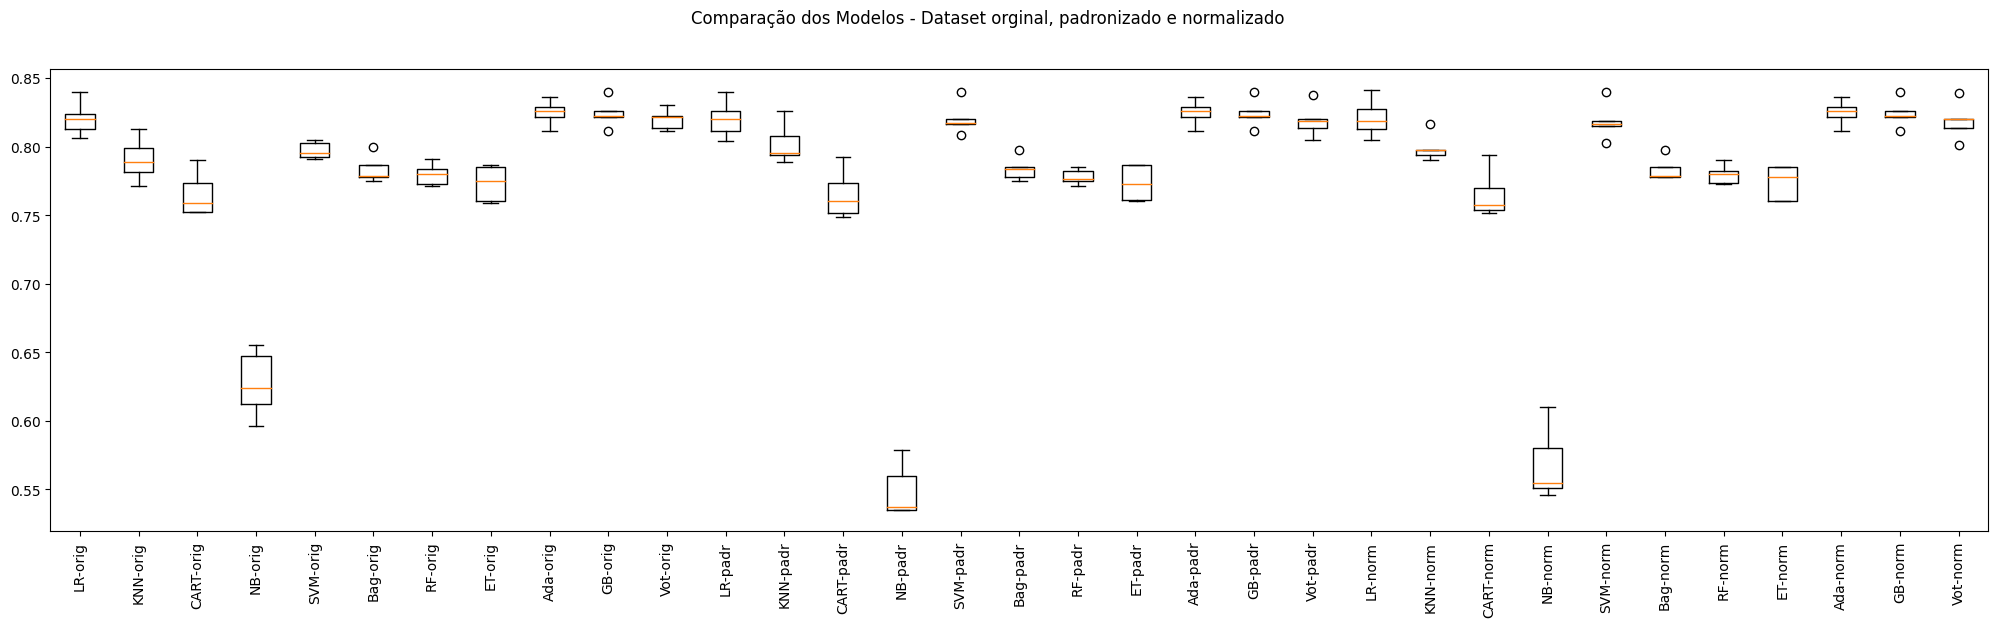

In [34]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

####3.2.1 Resultados complemetares

Os resultados mostram as acurácias médias e os desvios padrão dos modelos de classificação aplicados em três conjuntos de dados diferentes: o dataset original, o dataset padronizado e o dataset normalizado. Os modelos AdaBoost e Gradient Boosting apresentaram o melhor desempenho geral, obtendo as maiores acurácias médias de aproximadamente 82.9% em todos os conjuntos de dados, enquanto o Naive Bayes teve o pior desempenho com uma acurácia média em torno de 60%. A padronização e normalização dos dados parecem ter pouca influência nos resultados, já que as acurácias médias para cada modelo são praticamente as mesmas em todos os conjuntos de dados. Globalmente, os modelos exibiram um desempenho razoável para a tarefa de classificação binária de predição de salários.


##4. Avaliação de Resultados

A escolha da **métrica de acurácia** para avaliar o modelo AdaBoostClassifier no problema de classificação binária, onde o objetivo é predizer em qual das duas faixas de renda o indivíduo pertence, é justificada pela sua adequação para esse tipo de tarefa. A acurácia é uma métrica simples e intuitiva que mede a taxa de acerto do modelo, ou seja, a proporção de previsões corretas em relação ao total de previsões realizadas.

No contexto do problema em questão, onde existem apenas duas classes de interesse (">50k" ou "<=50K"), a acurácia é uma métrica relevante para avaliar o desempenho do modelo, pois busca medir o quão bem ele está fazendo as previsões corretas em ambas as classes. A alta acurácia obtida tanto na base de treino quanto na base de teste (0.8293 e 0.8285, respectivamente) indica que o modelo teve um bom desempenho na tarefa de predição e foi capaz de realizar previsões precisas e coerentes em ambas as amostras de dados.

O modelo selecionado para a avaliação é o AdaBoostClassifier aplicamos validação cruzada na base de treino para avaliar o desempenho médio do modelo em diferentes partições dos dados. Posteriormente, o modelo foi testado na base de teste, que permaneceu isolada durante o treinamento, para estimar a acurácia final do modelo em dados não vistos. Essa abordagem de treinamento e teste segregados garante uma avaliação mais confiável da qualidade e performance do modelo na tarefa de predição de classes. </br>
O **resultado final** da acurácia no conjunto de teste ficou em 0.8285, muito próximo do valor verificado com a base de treino 0.8293. Não foi observado overfitting e nem underfitting, a predição foi satisfatória e coerente com os resultados dos modelos na base de treino.

#### 4.1 Otimização dos hiperparâmetros
Em análise dos valores de acurácia obtidos após aplicação da validação cruzada e confirmado após aplicação da normalização e padronização no pipeline,observei uma  melhor performance dos ensambles e resolvi testar a variação dos hiperparametros para o AdaBoost. O GridSearchCV apresentou como resposta Melhores hiperparâmetros: {'learning_rate': 0.5, 'n_estimators': 100}.



In [35]:
# Tuning do AdaBoost
np.random.seed(7) # definindo uma semente global para este bloco

# Definir os hiperparâmetros que deseja otimizar
parametros = {
    'n_estimators': [50, 100, 150],  # número de estimadores
    'learning_rate': [0.1, 0.5, 1.0]  # taxa de aprendizado
}

# Criar uma instância do AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Criar uma instância do GridSearchCV
grid_search = GridSearchCV(adaboost, parametros, cv=5)

# Realizar a busca em grade (grid search) com validação cruzada
grid_search.fit(X_train, y_train)

# Visualizar os melhores hiperparâmetros encontrados
melhores_hiperparametros = grid_search.best_params_
print("Melhores hiperparâmetros:", melhores_hiperparametros)

Melhores hiperparâmetros: {'learning_rate': 0.5, 'n_estimators': 100}


In [36]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
adaboost = AdaBoostClassifier(learning_rate=0.5,n_estimators=100)
adaboost.fit(X_train, y_train)

name = 'adaboost'

cv_results = cross_val_score(adaboost, X_train, y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)


# Estimativa da acurácia no conjunto de teste
y_pred = adaboost.predict(X_test)
print(accuracy_score(y_test, y_pred))

adaboost: 0.827000 (0.010204)
0.813


###4.1 Verificação da Hipóteste:

**Hipótese:** A idade média dos indivíduos com salário ">50.000" será maior do que a idade média dos indivíduos com salário "<=50.000".

A hipóteste foi comprovada verdadeira, haja vista média das idades dos indivíduos com salário "<=50.000" ficou em aproximadamente 37 anos, enquanto que para as pessoas com salário  ">50.000" a média de idade foi calculada em aproximadamente 45 anos.

In [37]:
# Filtrar as idades para os casos em que a predição é igual a 1
ages_pred_1 = X_test.loc[y_pred == 1, 'age']

# Filtrar as idades para os casos em que a predição é igual a 0
ages_pred_0 = X_test.loc[y_pred == 0, 'age']

# Calcular a média de idade para cada caso
mean_age_pred_1 = np.mean(ages_pred_1)
mean_age_pred_0 = np.mean(ages_pred_0)

print("Média de idade para predição 1:", mean_age_pred_1)
print("Média de idade para predição 0:", mean_age_pred_0)

Média de idade para predição 1: 37.8932384341637
Média de idade para predição 0: 44.76433121019108


A idade tem uma influência significativa da determinação do Target em relação aos outros atributos.

In [38]:
# Verificar a importância de cada feature
feature_importance = adaboost.feature_importances_
print("Importância de cada feature:")
for feature, importance in zip(dataset.columns, feature_importance):
    print(feature, ":", importance)

Importância de cada feature:
age : 0.59
workclass : 0.13
fnlwgt : 0.0
education : 0.0
education-num : 0.0
marital-status : 0.0
occupation : 0.0
relationship : 0.0
race : 0.02
sex : 0.01
capital-gain : 0.01
capital-loss : 0.02
hours-per-week : 0.01
native-country : 0.0
salary : 0.0


###Como observado abaixo a grande maioria da população tem salário menor que os 50k anuais.

O modelo está acertando mais de 80% o que representa um resultado satisfatório para o problema apresentado.

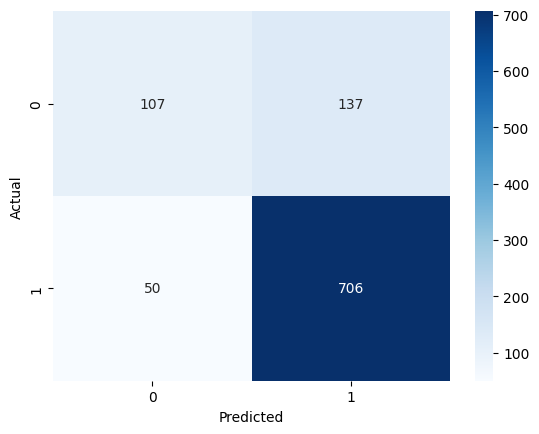

In [39]:
# Construir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar o gráfico de matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar os rótulos dos eixos
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Exibir o gráfico
plt.show()